<a href="https://colab.research.google.com/github/shashwatsaket46/Deep-Learning-Projects/blob/main/Face_detection_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
from sklearn.datasets import fetch_lfw_people
people=fetch_lfw_people(min_faces_per_person=20,resize=0.7)

In [57]:
image_shape=people.images[0].shape

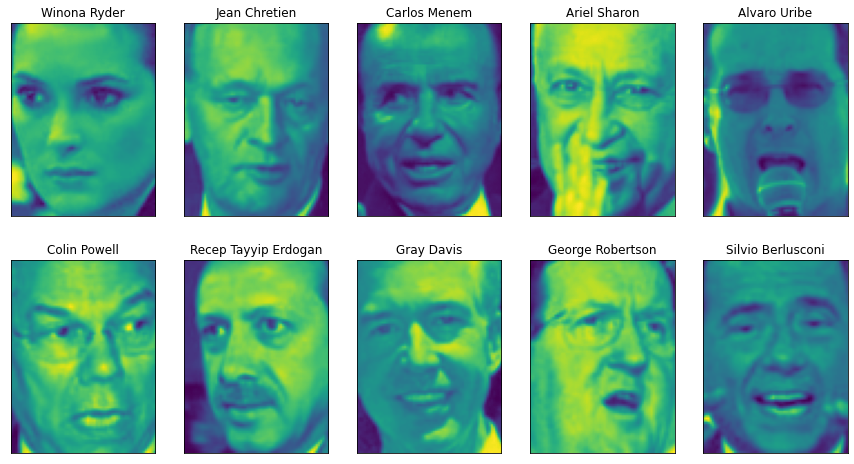

In [58]:
from matplotlib import pyplot as plt
fix,axes=plt.subplots(2,5,figsize=(15,8),
                     subplot_kw={'xticks': (),'yticks':()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
  ax.imshow(image)
  ax.set_title(people.target_names[target])

In [59]:
print("People image: {}".format(people.images.shape))
print("Number of classes: {}".format(people.target_names))

People image: (3023, 87, 65)
Number of classes: ['Alejandro Toledo' 'Alvaro Uribe' 'Amelie Mauresmo' 'Andre Agassi'
 'Angelina Jolie' 'Ariel Sharon' 'Arnold Schwarzenegger'
 'Atal Bihari Vajpayee' 'Bill Clinton' 'Carlos Menem' 'Colin Powell'
 'David Beckham' 'Donald Rumsfeld' 'George Robertson' 'George W Bush'
 'Gerhard Schroeder' 'Gloria Macapagal Arroyo' 'Gray Davis'
 'Guillermo Coria' 'Hamid Karzai' 'Hans Blix' 'Hugo Chavez' 'Igor Ivanov'
 'Jack Straw' 'Jacques Chirac' 'Jean Chretien' 'Jennifer Aniston'
 'Jennifer Capriati' 'Jennifer Lopez' 'Jeremy Greenstock' 'Jiang Zemin'
 'John Ashcroft' 'John Negroponte' 'Jose Maria Aznar'
 'Juan Carlos Ferrero' 'Junichiro Koizumi' 'Kofi Annan' 'Laura Bush'
 'Lindsay Davenport' 'Lleyton Hewitt' 'Luiz Inacio Lula da Silva'
 'Mahmoud Abbas' 'Megawati Sukarnoputri' 'Michael Bloomberg' 'Naomi Watts'
 'Nestor Kirchner' 'Paul Bremer' 'Pete Sampras' 'Recep Tayyip Erdogan'
 'Ricardo Lagos' 'Roh Moo-hyun' 'Rudolph Giuliani' 'Saddam Hussein'
 'Serena Will

In [60]:
import numpy as np
counts=np.bincount(people.target)
for i,(count,name) in enumerate(zip(counts, people.target_names)):
  print("{0:25} {1:3}".format(name,count), end='  ')
  if(i+1)%3==0:
    print()

Alejandro Toledo           39  Alvaro Uribe               35  Amelie Mauresmo            21  
Andre Agassi               36  Angelina Jolie             20  Ariel Sharon               77  
Arnold Schwarzenegger      42  Atal Bihari Vajpayee       24  Bill Clinton               29  
Carlos Menem               21  Colin Powell              236  David Beckham              31  
Donald Rumsfeld           121  George Robertson           22  George W Bush             530  
Gerhard Schroeder         109  Gloria Macapagal Arroyo    44  Gray Davis                 26  
Guillermo Coria            30  Hamid Karzai               22  Hans Blix                  39  
Hugo Chavez                71  Igor Ivanov                20  Jack Straw                 28  
Jacques Chirac             52  Jean Chretien              55  Jennifer Aniston           21  
Jennifer Capriati          42  Jennifer Lopez             21  Jeremy Greenstock          24  
Jiang Zemin                20  John Ashcroft              53

In [61]:
mask=np.zeros(people.target.shape,dtype=np.bool_)
for target in np.unique(people.target):
  mask[np.where(people.target==target)[0][:50]]=1
  X_people=people.data[mask]
  y_people=people.target[mask]
  X_people=X_people/255.

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test=train_test_split(
    X_people,y_people,stratify=y_people,random_state=0
)
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
print("Test set score of 1-nn: {:.2f}".format(knn.score(X_test,y_test)))


Test set score of 1-nn: 0.23


In [63]:
pip install mglearn

In [64]:
import mglearn as mg

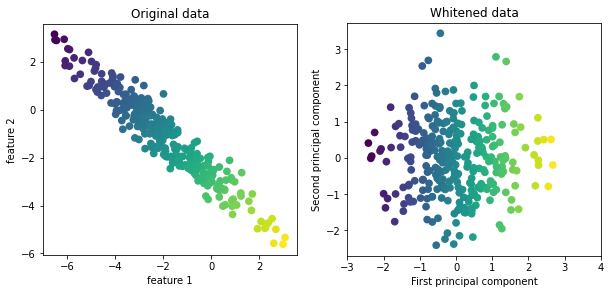

In [65]:
mg.plots.plot_pca_whitening()

In [66]:
from sklearn.decomposition import PCA
pca=PCA(n_components=100, whiten=True, random_state=0).fit(X_train)
X_train_pca=pca.transform(X_train)
X_test_pca=pca.transform(X_test)

In [67]:
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train_pca,y_train)
print("Test set accuracy: {:2f}".format(knn.score(X_test_pca,y_test)))

Test set accuracy: 0.312016


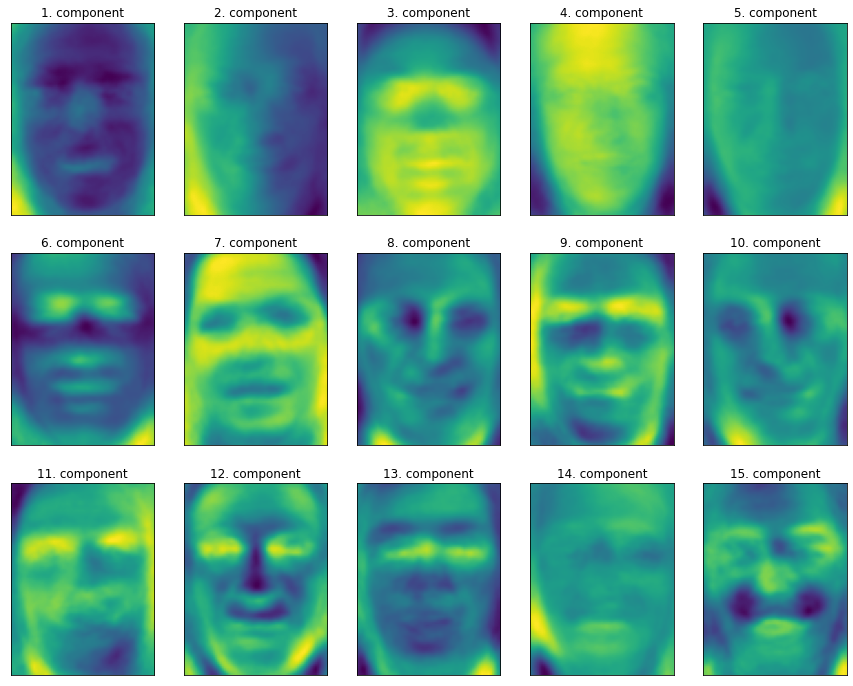

In [72]:
fix, axes=plt.subplots(3,5,figsize=(15,12),
                       subplot_kw={'xticks':(),'yticks':()})
for i, (component,ax) in enumerate(zip(pca.components_, axes.ravel())):
  ax.imshow(component.reshape(image_shape),cmap='viridis')
  ax.set_title("{}. component".format((i+1)))

________________________________________________________________________________
[Memory] Calling mglearn.plot_pca.pca_faces...
pca_faces(array([[0.535948, ..., 0.243137],
       ...,
       [0.043137, ..., 0.596078]], dtype=float32), 
array([[0.237908, ..., 0.269281],
       ...,
       [0.4     , ..., 0.254902]], dtype=float32))
________________________________________________________pca_faces - 6.4s, 0.1min


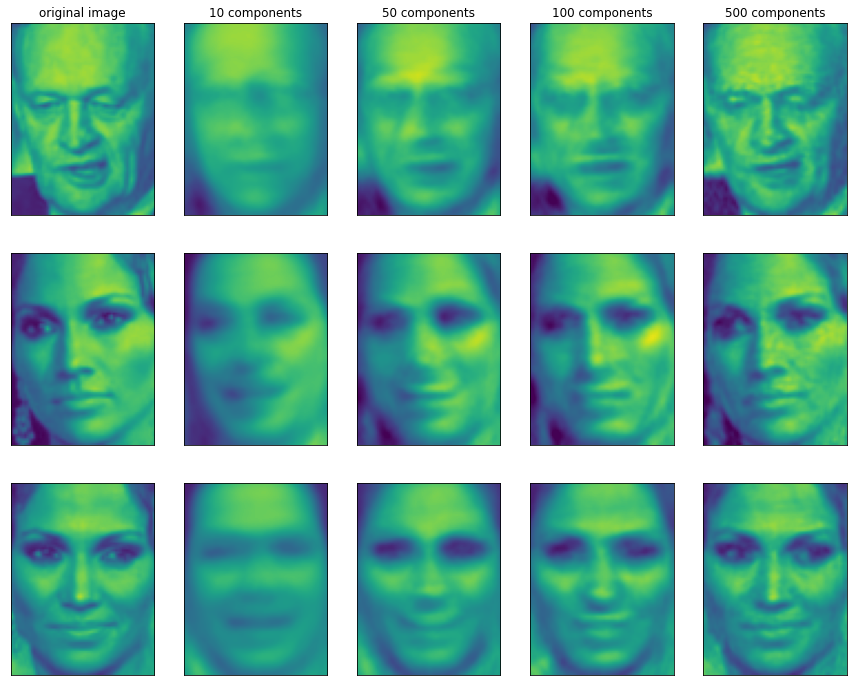

In [75]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)

Text(0, 0.5, 'Second Principal Component')

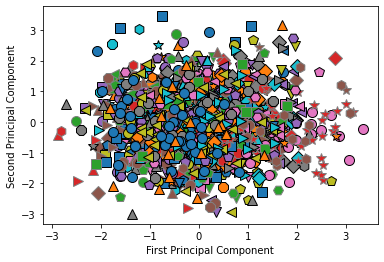

In [76]:
mglearn.discrete_scatter(X_train_pca[:,0], X_train_pca[:,1], y_train)
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")